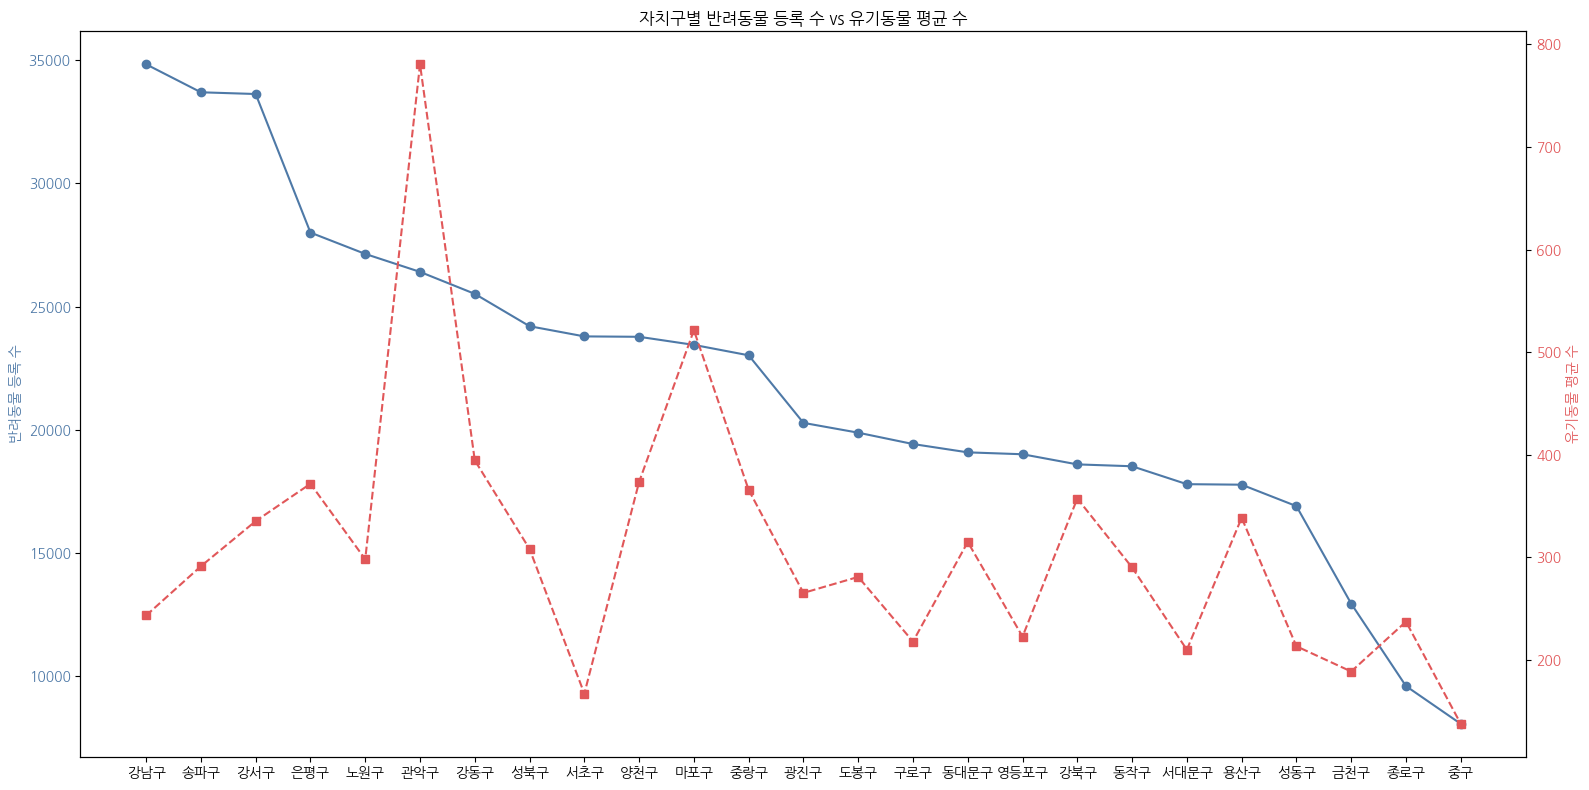

In [5]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# ‚ñ∂Ô∏è .env ÌååÏùºÏùò ÌôòÍ≤ΩÎ≥ÄÏàò Î∂àÎü¨Ïò§Í∏∞
load_dotenv("/home/jiming/dev_ws/eda-repo-3/env")
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")

# ‚ñ∂Ô∏è MySQL Ïó∞Í≤∞
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:3306/{database}")

# ‚ñ∂Ô∏è Îç∞Ïù¥ÌÑ∞ Ï°∞Ìöå (Îì±Î°ùÌòÑÌô©) ========================================
query = """
SELECT 
    sigungu as ÏãúÍµ∞Íµ¨,
    total_registered as Ï¥ùÎì±Î°ù_ÎàÑÍ≥Ñ
FROM companion_animal_registration
WHERE sido = 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú'
ORDER BY total_registered DESC
"""
df_register = pd.read_sql(query, engine)

df_register.columns = ['ÏãúÍµ∞Íµ¨','Ï¥ùÎì±Î°ù_ÎàÑÍ≥Ñ']




# ‚ñ∂Ô∏è Ïú†Í∏∞ÎèôÎ¨º ÎßàÎ¶¨Ïàò Í∞ÄÏ†∏Ïò§Í∏∞ =======================================
query = """
SELECT *
FROM seoul_abandonment_statistics
ORDER BY district_name
"""
df = pd.read_sql(query, engine)
df.columns =['id','ÏûêÏπòÍµ¨', '2016', '2017', '2018', '2019', '2020', 'ÏÇ≠Ï†ú']

# ÌïÑÏöîÏóÜÎäî column Ï†úÍ±∞ÌïòÍ∏∞
df = df.drop(columns =['id', 'ÏÇ≠Ï†ú'])

# ÌèâÍ∑†Í∞í Íµ¨ÌïòÍ∏∞
df['ÌèâÍ∑†'] = df[['2016', '2017', '2018', '2019', '2020']].mean(axis=1)

# ÌïÑÏöîÏóÜÎäî column Ï†úÍ±∞ÌïòÍ∏∞
df = df.drop(columns =['2016', '2017','2018','2019','2020'])

df_sorted = df.sort_values(by='ÌèâÍ∑†', ascending=False)



# ÎëêÍ∞ú Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©ÌïòÍ∏∞ =============================================
df_register = df_register.rename(columns={'ÏãúÍµ∞Íµ¨':'ÏûêÏπòÍµ¨'})
df_merged = pd.merge(df_register, df_sorted, on='ÏûêÏπòÍµ¨', how='inner')
df_merged.columns=['ÏûêÏπòÍµ¨', 'Î∞òÎ†§ÎèôÎ¨º_Îì±Î°ùÏàò', 'Ïú†Í∏∞ÎèôÎ¨º_ÌèâÍ∑†']



# ÎëêÍ∞ú Î≥ëÌï©ÌïòÍ∏∞ (scale Îã§Î•¥Í≤å) ================================
df_merged_sorted = df_merged.sort_values(by='Î∞òÎ†§ÎèôÎ¨º_Îì±Î°ùÏàò', ascending=False)

plt.figure(figsize=(16, 8))

# Ï≤´ Î≤àÏß∏ yÏ∂ï
ax1 = plt.gca()
ax1.plot(df_merged_sorted['ÏûêÏπòÍµ¨'], df_merged_sorted['Î∞òÎ†§ÎèôÎ¨º_Îì±Î°ùÏàò'],color='#4e79a7', marker='o', label='Î∞òÎ†§ÎèôÎ¨º Îì±Î°ù Ïàò')
ax1.set_ylabel('Î∞òÎ†§ÎèôÎ¨º Îì±Î°ù Ïàò', color='#4e79a7')
ax1.tick_params(axis='y', labelcolor='#4e79a7')

# Îëê Î≤àÏß∏ yÏ∂ï
ax2 = ax1.twinx()
ax2.plot(df_merged_sorted['ÏûêÏπòÍµ¨'], df_merged_sorted['Ïú†Í∏∞ÎèôÎ¨º_ÌèâÍ∑†'], color='#e15759',marker='s', linestyle='--', label='Ïú†Í∏∞ÎèôÎ¨º ÌèâÍ∑† Ïàò')
ax2.set_ylabel('Ïú†Í∏∞ÎèôÎ¨º ÌèâÍ∑† Ïàò', color='#e15759')
ax2.tick_params(axis='y', labelcolor='#e15759')

# Í≥µÌÜµ xÏ∂ï
plt.xticks(rotation=45)
plt.title('ÏûêÏπòÍµ¨Î≥Ñ Î∞òÎ†§ÎèôÎ¨º Îì±Î°ù Ïàò vs Ïú†Í∏∞ÎèôÎ¨º ÌèâÍ∑† Ïàò')
plt.tight_layout()

plt.show()




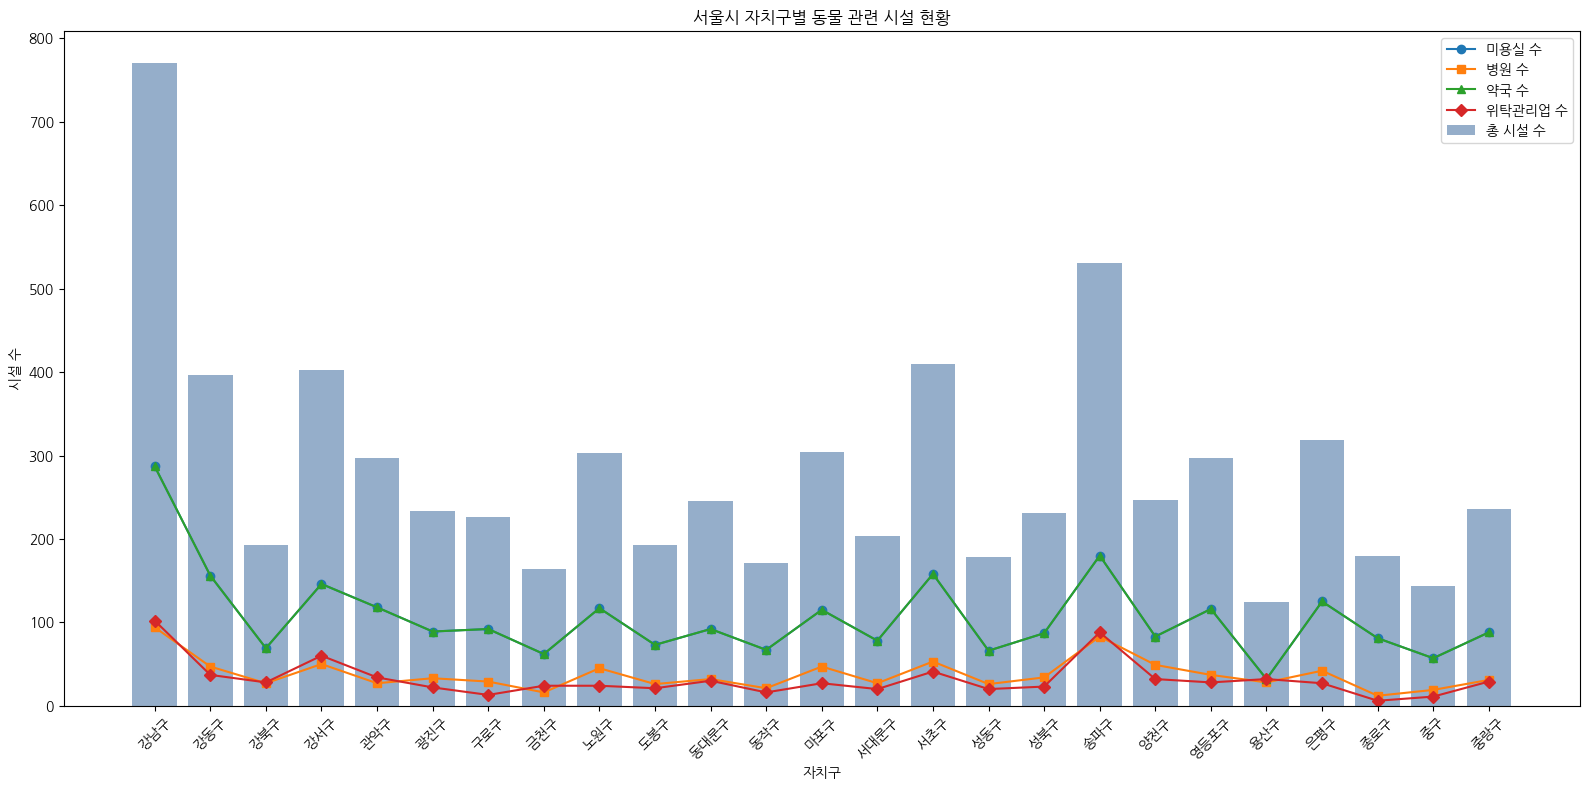

In [6]:
# ===========================================

# Í≥ºÏó∞ Î∞òÎ†§ÎèôÎ¨º ÏóÖÏû•ÏùÄ Î™∞Î†§ÏûàÏùÑÍπå AND Î∞òÎ†§ÎèôÎ¨º Îì±Î°ùÏàòÍ∞Ä ÎÜíÏùÄÍ∞Ä

# ===========================================


import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# ‚ñ∂Ô∏è .env ÌååÏùºÏùò ÌôòÍ≤ΩÎ≥ÄÏàò Î∂àÎü¨Ïò§Í∏∞
load_dotenv("/home/jiming/dev_ws/eda-repo-3/env")
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")

# ‚ñ∂Ô∏è MySQL Ïó∞Í≤∞
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:3306/{database}")


# ‚ñ∂Ô∏è ÎØ∏Ïö©Ïã§ ========================================
query = """
SELECT *
FROM animal_pharmacy_registry
WHERE (status_name LIKE 'ÏòÅÏóÖ/Ï†ïÏÉÅ') AND (jibun_address LIKE 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú%%')
"""
df = pd.read_sql(query, engine)

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 1: Î¨∏ÏûêÏó¥ Î∂ÑÌï†
df['district'] = df['jibun_address'].str.split(' ').str[2]

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 2: Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©
import re
df['district'] = df['jibun_address'].str.extract(r'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ([Í∞Ä-Ìû£]+Íµ¨)')

# Íµ¨Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'beauty_count']
district_counts = district_counts.sort_values('beauty_count', ascending=False)

df_beauty = district_counts



# ‚ñ∂Ô∏è Î≥ëÏõê =======================================
query = """
SELECT jibun_address
FROM animal_hospital_registry
WHERE (status_name LIKE 'ÏòÅÏóÖ/Ï†ïÏÉÅ') AND (jibun_address LIKE 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú%%')
"""
df = pd.read_sql(query, engine)

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 1: Î¨∏ÏûêÏó¥ Î∂ÑÌï†
df['district'] = df['jibun_address'].str.split(' ').str[2]

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 2: Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©
import re
df['district'] = df['jibun_address'].str.extract(r'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ([Í∞Ä-Ìû£]+Íµ¨)')

# Íµ¨Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'hospital_count']
district_counts = district_counts.sort_values('hospital_count', ascending=False)

df_hospital = district_counts

# ‚ñ∂Ô∏è ÏïΩÍµ≠ =======================================
query = """
SELECT *
FROM animal_pharmacy_registry
WHERE (status_name LIKE 'ÏòÅÏóÖ/Ï†ïÏÉÅ') AND (jibun_address LIKE 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú%%')
"""
df = pd.read_sql(query, engine)

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 1: Î¨∏ÏûêÏó¥ Î∂ÑÌï†
df['district'] = df['jibun_address'].str.split(' ').str[2]

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 2: Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©
import re
df['district'] = df['jibun_address'].str.extract(r'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ([Í∞Ä-Ìû£]+Íµ¨)')

# Íµ¨Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'pharmacy_count']
district_counts = district_counts.sort_values('pharmacy_count', ascending=False)

df_pharmacy = district_counts


# ‚ñ∂Ô∏è ÏúÑÌÉÅÍ¥ÄÎ¶¨ÏóÖ =======================================
query = """
SELECT *
FROM seoul_animal_trust_facility
WHERE (status_name LIKE 'ÏòÅÏóÖ/Ï†ïÏÉÅ') AND (jibun_address LIKE 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú%%')
"""
df = pd.read_sql(query, engine)

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 1: Î¨∏ÏûêÏó¥ Î∂ÑÌï†
df['district'] = df['jibun_address'].str.split(' ').str[2]

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 2: Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©
import re
df['district'] = df['jibun_address'].str.extract(r'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ([Í∞Ä-Ìû£]+Íµ¨)')

# Íµ¨Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'animal_trust_count']
district_counts = district_counts.sort_values('animal_trust_count', ascending=False)


df_hotel = district_counts


# Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©ÌïòÍ∏∞ =============================================
df_merged = pd.merge(df_beauty, df_hospital,  on='district', how='inner')
df_merged = pd.merge(df_merged,df_pharmacy, on='district', how='inner')
df_merged = pd.merge(df_merged, df_hotel, on='district', how='inner')

df_merged_sorted = df_merged.sort_values(by='district', ascending=True)
df_merged_sorted['total_facilities'] = df_merged_sorted[['beauty_count', 'hospital_count', 'pharmacy_count', 'animal_trust_count']].sum(axis=1)



#ÏãúÍ∞ÅÌôî ================================================

plt.figure(figsize=(16,8))

x = df_merged_sorted['district']

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ (total_facilities)
plt.bar(x, df_merged_sorted['total_facilities'], color='#4e79a7', alpha=0.6, label='Ï¥ù ÏãúÏÑ§ Ïàò')

# Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ (ÎØ∏Ïö©Ïã§, Î≥ëÏõê, ÏïΩÍµ≠, ÏúÑÌÉÅÍ¥ÄÎ¶¨ÏóÖ)
plt.plot(x, df_merged_sorted['beauty_count'], marker='o', label='ÎØ∏Ïö©Ïã§ Ïàò')
plt.plot(x, df_merged_sorted['hospital_count'], marker='s', label='Î≥ëÏõê Ïàò')
plt.plot(x, df_merged_sorted['pharmacy_count'], marker='^', label='ÏïΩÍµ≠ Ïàò')
plt.plot(x, df_merged_sorted['animal_trust_count'], marker='D', label='ÏúÑÌÉÅÍ¥ÄÎ¶¨ÏóÖ Ïàò')

plt.xticks(rotation=45)
plt.xlabel('ÏûêÏπòÍµ¨')
plt.ylabel('ÏãúÏÑ§ Ïàò')
plt.title('ÏÑúÏö∏Ïãú ÏûêÏπòÍµ¨Î≥Ñ ÎèôÎ¨º Í¥ÄÎ†® ÏãúÏÑ§ ÌòÑÌô©')

plt.legend()
plt.tight_layout()
plt.show()






# # Ï≤´ Î≤àÏß∏ yÏ∂ï
# ax1 = plt.gca()
# line1, = ax1.plot(df_merged_sorted['ÏûêÏπòÍµ¨'], df_merged_sorted['Î∞òÎ†§ÎèôÎ¨º_Îì±Î°ùÏàò'],color='#4e79a7', marker='o', label='Î∞òÎ†§ÎèôÎ¨º Îì±Î°ù Ïàò')
# ax1.set_ylabel('Î∞òÎ†§ÎèôÎ¨º Îì±Î°ù Ïàò', color='#4e79a7')
# ax1.tick_params(axis='y', labelcolor='#4e79a7')

# # Îëê Î≤àÏß∏ yÏ∂ï
# ax2 = ax1.twinx()
# line2, = ax2.plot(df_merged_sorted['ÏûêÏπòÍµ¨'], df_merged_sorted['Ïú†Í∏∞ÎèôÎ¨º_ÌèâÍ∑†'], color='#e15759',marker='s', linestyle='--', label='Ïú†Í∏∞ÎèôÎ¨º ÌèâÍ∑† Ïàò')
# ax2.set_ylabel('Ïú†Í∏∞ÎèôÎ¨º ÌèâÍ∑† Ïàò', color='#e15759')
# ax2.tick_params(axis='y', labelcolor='#e15759')

# # Í≥µÌÜµ xÏ∂ï
# plt.xticks(rotation=45)
# plt.title('ÏûêÏπòÍµ¨Î≥Ñ Î∞òÎ†§ÎèôÎ¨º Îì±Î°ù Ïàò vs Ïú†Í∏∞ÎèôÎ¨º ÌèâÍ∑† Ïàò')
# plt.tight_layout()


# lines = [line1, line2]
# labels = [line.get_label() for line in lines]
# ax1.legend(lines, labels, loc='upper right')


# # ‚ñ∂Ô∏è Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• Í≤ΩÎ°ú ÏßÄÏ†ï
# output_path = 'RESULT/visualization/Î∞òÎ†§ÎèôÎ¨ºÎì±Î°ùÏàò_AND_Ïú†Í∏∞ÎèôÎ¨ºÏàò_Í∫æÏùÄÏÑ†Í∑∏ÎûòÌîÑ.png'
# # os.makedirs(os.path.dirname(output_path), exist_ok=True)  # Ìè¥ÎçîÍ∞Ä ÏóÜÏúºÎ©¥ ÏÉùÏÑ±
# plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Í≥†Ìï¥ÏÉÅÎèÑ Ï†ÄÏû•

# plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import folium
from sqlalchemy import create_engine
from shapely.geometry import shape
from io import BytesIO
import base64

from dotenv import load_dotenv
import os
import json

# .env ÌååÏùºÏùÑ Ï∞æÏïÑ ÌôòÍ≤Ω Î≥ÄÏàòÎ°ú Î°úÎìú
load_dotenv()

# ÌôòÍ≤Ω Î≥ÄÏàò Í∞ÄÏ†∏Ïò§Í∏∞
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")

# ‚ñ∂Ô∏è MySQL Ïó∞Í≤∞
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:3306/{database}")



# ‚ñ∂Ô∏è ÏÑúÏö∏ ÎèôÎ¨ºÏïΩÍµ≠ Ïàò Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
  # ÏòÅÏóÖ/Ï†ïÏÉÅ : ÌïÑÌÑ∞ÎßÅ
  # ÏÑúÏö∏ÌäπÎ≥ÑÏãú : ÏßÄÏó≠ÏúºÎ°ú ÌïÑÌÑ∞ÎßÅ
  
query = """
SELECT *
FROM animal_pharmacy_registry
WHERE (status_name LIKE 'ÏòÅÏóÖ/Ï†ïÏÉÅ') AND (jibun_address LIKE 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú%%')
"""
df = pd.read_sql(query, engine)

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 1: Î¨∏ÏûêÏó¥ Î∂ÑÌï†
df['district'] = df['jibun_address'].str.split(' ').str[2]

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 2: Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©
import re
df['district'] = df['jibun_address'].str.extract(r'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ([Í∞Ä-Ìû£]+Íµ¨)')

# Íµ¨Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'pharmacy_count']
district_counts = district_counts.sort_values('pharmacy_count', ascending=False)

print(district_counts)
# # ‚ñ∂Ô∏è ÏãúÍ∞ÅÌôî (ÏûêÏπòÍµ¨Î≥Ñ Ïó∞ÎèÑÎ≥Ñ Ïú†Í∏∞Í≤¨ Î∞úÏÉù Ï∂îÏù¥)
# plt.figure(figsize=(14, 8))
# plt.bar(district_counts['district'], district_counts['pharmacy_count'])
# plt.title("‚úÖ ÏûêÏπòÍµ¨Î≥Ñ ÎèôÎ¨ºÏïΩÍµ≠ ÌòÑÌô© 2024", fontsize=16)
# plt.xlabel("ÏûêÏπòÍµ¨(ÏÑúÏö∏)")
# plt.ylabel("ÎèôÎ¨ºÏïΩÍµ≠ Ïàò")
# plt.grid(True, linestyle='--', alpha=0.6)
# # plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
# # plt.tight_layout()
# # plt.show()

# plt.savefig("RESULT/visualization/ÌñâÏ†ïÏïàÏ†ÑÎ∂Ä_ÏÑúÏö∏Ïãú_ÎèôÎ¨ºÏïΩÍµ≠Ïàò_ÎßâÎåÄÍ∑∏ÎûòÌîÑ.png")


   district  pharmacy_count
0       Í∞ïÎÇ®Íµ¨             287
1       ÏÜ°ÌååÍµ¨             180
2       ÏÑúÏ¥àÍµ¨             158
3       Í∞ïÎèôÍµ¨             156
4       Í∞ïÏÑúÍµ¨             146
5       ÏùÄÌèâÍµ¨             125
6       Í¥ÄÏïÖÍµ¨             118
7       ÎÖ∏ÏõêÍµ¨             117
8      ÏòÅÎì±Ìè¨Íµ¨             116
9       ÎßàÌè¨Íµ¨             115
10      Íµ¨Î°úÍµ¨              92
11     ÎèôÎåÄÎ¨∏Íµ¨              92
12      Í¥ëÏßÑÍµ¨              89
13      Ï§ëÎûëÍµ¨              88
14      ÏÑ±Î∂ÅÍµ¨              87
15      ÏñëÏ≤úÍµ¨              83
16      Ï¢ÖÎ°úÍµ¨              81
17     ÏÑúÎåÄÎ¨∏Íµ¨              78
18      ÎèÑÎ¥âÍµ¨              73
19      Í∞ïÎ∂ÅÍµ¨              69
20      ÎèôÏûëÍµ¨              67
21      ÏÑ±ÎèôÍµ¨              66
22      Í∏àÏ≤úÍµ¨              62
23       Ï§ëÍµ¨              57
24      Ïö©ÏÇ∞Íµ¨              32


In [8]:
query = """
SELECT *
FROM animal_pharmacy_registry
WHERE (status_name LIKE 'ÏòÅÏóÖ/Ï†ïÏÉÅ') AND (jibun_address LIKE 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú%%')
"""
df = pd.read_sql(query, engine)

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 1: Î¨∏ÏûêÏó¥ Î∂ÑÌï†
df['district'] = df['jibun_address'].str.split(' ').str[2]

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 2: Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©
import re
df['district'] = df['jibun_address'].str.extract(r'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ([Í∞Ä-Ìû£]+Íµ¨)')

# Íµ¨Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'beauty_count']
district_counts = district_counts.sort_values('beauty_count', ascending=False)

print(district_counts)

   district  beauty_count
0       Í∞ïÎÇ®Íµ¨           287
1       ÏÜ°ÌååÍµ¨           180
2       ÏÑúÏ¥àÍµ¨           158
3       Í∞ïÎèôÍµ¨           156
4       Í∞ïÏÑúÍµ¨           146
5       ÏùÄÌèâÍµ¨           125
6       Í¥ÄÏïÖÍµ¨           118
7       ÎÖ∏ÏõêÍµ¨           117
8      ÏòÅÎì±Ìè¨Íµ¨           116
9       ÎßàÌè¨Íµ¨           115
10      Íµ¨Î°úÍµ¨            92
11     ÎèôÎåÄÎ¨∏Íµ¨            92
12      Í¥ëÏßÑÍµ¨            89
13      Ï§ëÎûëÍµ¨            88
14      ÏÑ±Î∂ÅÍµ¨            87
15      ÏñëÏ≤úÍµ¨            83
16      Ï¢ÖÎ°úÍµ¨            81
17     ÏÑúÎåÄÎ¨∏Íµ¨            78
18      ÎèÑÎ¥âÍµ¨            73
19      Í∞ïÎ∂ÅÍµ¨            69
20      ÎèôÏûëÍµ¨            67
21      ÏÑ±ÎèôÍµ¨            66
22      Í∏àÏ≤úÍµ¨            62
23       Ï§ëÍµ¨            57
24      Ïö©ÏÇ∞Íµ¨            32


In [9]:
query = """
SELECT *
FROM animal_pharmacy_registry
WHERE (status_name LIKE 'ÏòÅÏóÖ/Ï†ïÏÉÅ') AND (jibun_address LIKE 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú%%')
"""
df = pd.read_sql(query, engine)

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 1: Î¨∏ÏûêÏó¥ Î∂ÑÌï†
df['district'] = df['jibun_address'].str.split(' ').str[2]

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 2: Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©
import re
df['district'] = df['jibun_address'].str.extract(r'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ([Í∞Ä-Ìû£]+Íµ¨)')

# Íµ¨Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'pharmacy_count']
district_counts = district_counts.sort_values('pharmacy_count', ascending=False)

print(district_counts)

   district  pharmacy_count
0       Í∞ïÎÇ®Íµ¨             287
1       ÏÜ°ÌååÍµ¨             180
2       ÏÑúÏ¥àÍµ¨             158
3       Í∞ïÎèôÍµ¨             156
4       Í∞ïÏÑúÍµ¨             146
5       ÏùÄÌèâÍµ¨             125
6       Í¥ÄÏïÖÍµ¨             118
7       ÎÖ∏ÏõêÍµ¨             117
8      ÏòÅÎì±Ìè¨Íµ¨             116
9       ÎßàÌè¨Íµ¨             115
10      Íµ¨Î°úÍµ¨              92
11     ÎèôÎåÄÎ¨∏Íµ¨              92
12      Í¥ëÏßÑÍµ¨              89
13      Ï§ëÎûëÍµ¨              88
14      ÏÑ±Î∂ÅÍµ¨              87
15      ÏñëÏ≤úÍµ¨              83
16      Ï¢ÖÎ°úÍµ¨              81
17     ÏÑúÎåÄÎ¨∏Íµ¨              78
18      ÎèÑÎ¥âÍµ¨              73
19      Í∞ïÎ∂ÅÍµ¨              69
20      ÎèôÏûëÍµ¨              67
21      ÏÑ±ÎèôÍµ¨              66
22      Í∏àÏ≤úÍµ¨              62
23       Ï§ëÍµ¨              57
24      Ïö©ÏÇ∞Íµ¨              32


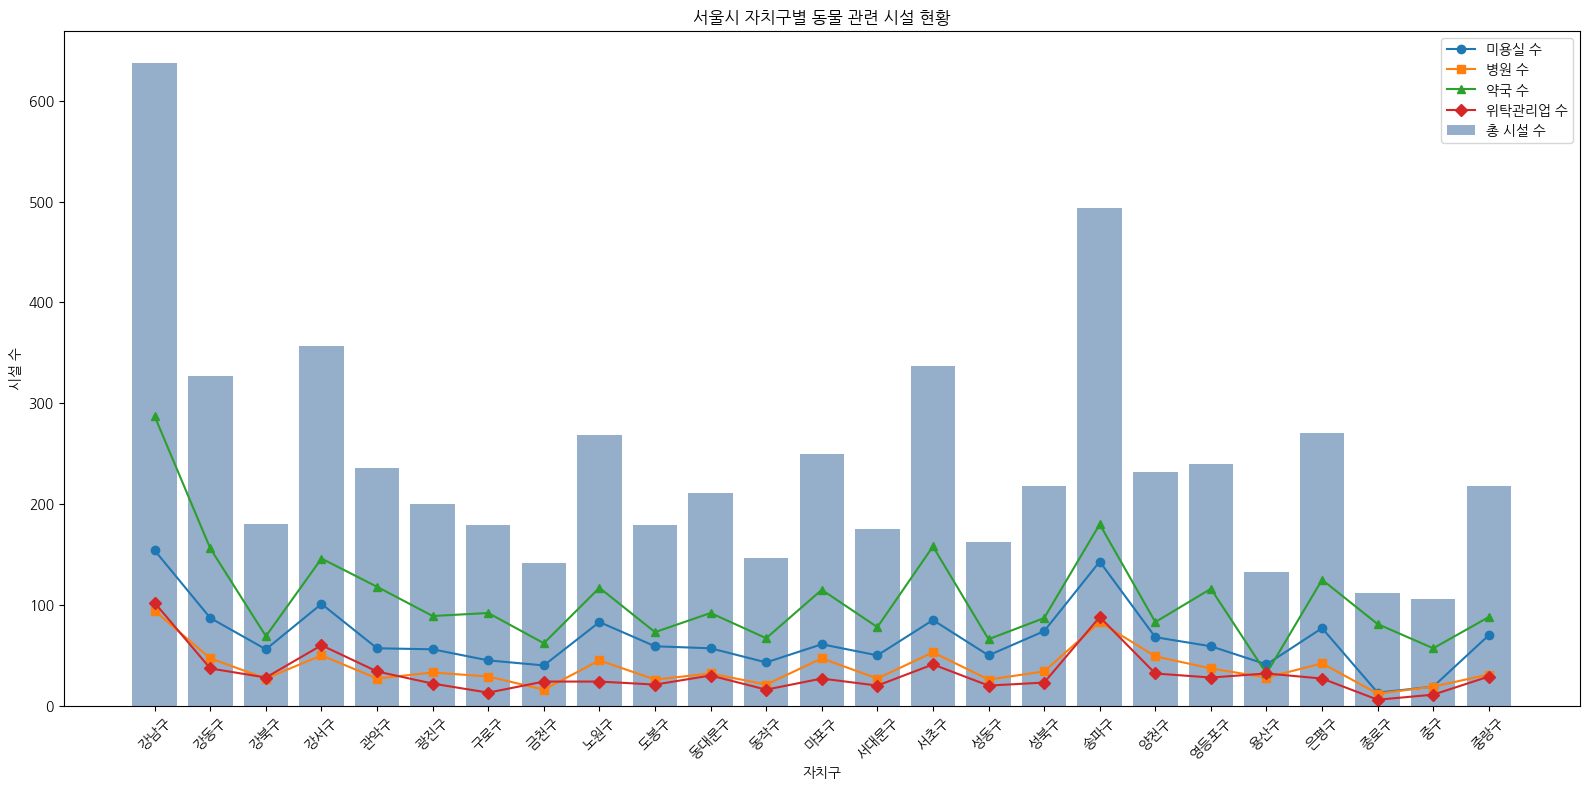

In [11]:
# ===========================================

# Í≥ºÏó∞ Î∞òÎ†§ÎèôÎ¨º ÏóÖÏû•ÏùÄ Î™∞Î†§ÏûàÏùÑÍπå AND Î∞òÎ†§ÎèôÎ¨º Îì±Î°ùÏàòÍ∞Ä ÎÜíÏùÄÍ∞Ä

# ===========================================


import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# ‚ñ∂Ô∏è .env ÌååÏùºÏùò ÌôòÍ≤ΩÎ≥ÄÏàò Î∂àÎü¨Ïò§Í∏∞
load_dotenv("/home/jiming/dev_ws/eda-repo-3/env")
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")

# ‚ñ∂Ô∏è MySQL Ïó∞Í≤∞
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:3306/{database}")


# ‚ñ∂Ô∏è ÎØ∏Ïö©Ïã§ ========================================
query = """
SELECT *
FROM animal_beauty_business
WHERE (status_name LIKE 'ÏòÅÏóÖ/Ï†ïÏÉÅ') AND (address_jibun LIKE 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú%%')
"""
df = pd.read_sql(query, engine)

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 1: Î¨∏ÏûêÏó¥ Î∂ÑÌï†
df['district'] = df['address_jibun'].str.split(' ').str[2]

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 2: Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©
import re
df['district'] = df['address_jibun'].str.extract(r'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ([Í∞Ä-Ìû£]+Íµ¨)')

# Íµ¨Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'beauty_count']
district_counts = district_counts.sort_values('beauty_count', ascending=False)
df_beauty = district_counts



# ‚ñ∂Ô∏è Î≥ëÏõê =======================================
query = """
SELECT jibun_address
FROM animal_hospital_registry
WHERE (status_name LIKE 'ÏòÅÏóÖ/Ï†ïÏÉÅ') AND (jibun_address LIKE 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú%%')
"""
df = pd.read_sql(query, engine)

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 1: Î¨∏ÏûêÏó¥ Î∂ÑÌï†
df['district'] = df['jibun_address'].str.split(' ').str[2]

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 2: Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©
import re
df['district'] = df['jibun_address'].str.extract(r'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ([Í∞Ä-Ìû£]+Íµ¨)')

# Íµ¨Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'hospital_count']
district_counts = district_counts.sort_values('hospital_count', ascending=False)

df_hospital = district_counts

# ‚ñ∂Ô∏è ÏïΩÍµ≠ =======================================
query = """
SELECT *
FROM animal_pharmacy_registry
WHERE (status_name LIKE 'ÏòÅÏóÖ/Ï†ïÏÉÅ') AND (jibun_address LIKE 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú%%')
"""
df = pd.read_sql(query, engine)

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 1: Î¨∏ÏûêÏó¥ Î∂ÑÌï†
df['district'] = df['jibun_address'].str.split(' ').str[2]

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 2: Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©
import re
df['district'] = df['jibun_address'].str.extract(r'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ([Í∞Ä-Ìû£]+Íµ¨)')

# Íµ¨Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'pharmacy_count']
district_counts = district_counts.sort_values('pharmacy_count', ascending=False)

df_pharmacy = district_counts


# ‚ñ∂Ô∏è ÏúÑÌÉÅÍ¥ÄÎ¶¨ÏóÖ =======================================
query = """
SELECT *
FROM seoul_animal_trust_facility
WHERE (status_name LIKE 'ÏòÅÏóÖ/Ï†ïÏÉÅ') AND (jibun_address LIKE 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú%%')
"""
df = pd.read_sql(query, engine)

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 1: Î¨∏ÏûêÏó¥ Î∂ÑÌï†
df['district'] = df['jibun_address'].str.split(' ').str[2]

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 2: Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©
import re
df['district'] = df['jibun_address'].str.extract(r'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ([Í∞Ä-Ìû£]+Íµ¨)')

# Íµ¨Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'animal_trust_count']
district_counts = district_counts.sort_values('animal_trust_count', ascending=False)


df_hotel = district_counts


# Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©ÌïòÍ∏∞ =============================================
df_merged = pd.merge(df_beauty, df_hospital,  on='district', how='inner')
df_merged = pd.merge(df_merged,df_pharmacy, on='district', how='inner')
df_merged = pd.merge(df_merged, df_hotel, on='district', how='inner')

df_merged_sorted = df_merged.sort_values(by='district', ascending=True)
df_merged_sorted['total_facilities'] = df_merged_sorted[['beauty_count', 'hospital_count', 'pharmacy_count', 'animal_trust_count']].sum(axis=1)



#ÏãúÍ∞ÅÌôî ================================================

plt.figure(figsize=(16,8))

x = df_merged_sorted['district']

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ (total_facilities)
plt.bar(x, df_merged_sorted['total_facilities'], color='#4e79a7', alpha=0.6, label='Ï¥ù ÏãúÏÑ§ Ïàò')

# Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ (ÎØ∏Ïö©Ïã§, Î≥ëÏõê, ÏïΩÍµ≠, ÏúÑÌÉÅÍ¥ÄÎ¶¨ÏóÖ)
plt.plot(x, df_merged_sorted['beauty_count'], marker='o', label='ÎØ∏Ïö©Ïã§ Ïàò')
plt.plot(x, df_merged_sorted['hospital_count'], marker='s', label='Î≥ëÏõê Ïàò')
plt.plot(x, df_merged_sorted['pharmacy_count'], marker='^', label='ÏïΩÍµ≠ Ïàò')
plt.plot(x, df_merged_sorted['animal_trust_count'], marker='D', label='ÏúÑÌÉÅÍ¥ÄÎ¶¨ÏóÖ Ïàò')

plt.xticks(rotation=45)
plt.xlabel('ÏûêÏπòÍµ¨')
plt.ylabel('ÏãúÏÑ§ Ïàò')
plt.title('ÏÑúÏö∏Ïãú ÏûêÏπòÍµ¨Î≥Ñ ÎèôÎ¨º Í¥ÄÎ†® ÏãúÏÑ§ ÌòÑÌô©')

plt.legend()
plt.tight_layout()
plt.show()




ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (25,) and arg 1 with shape (50,).

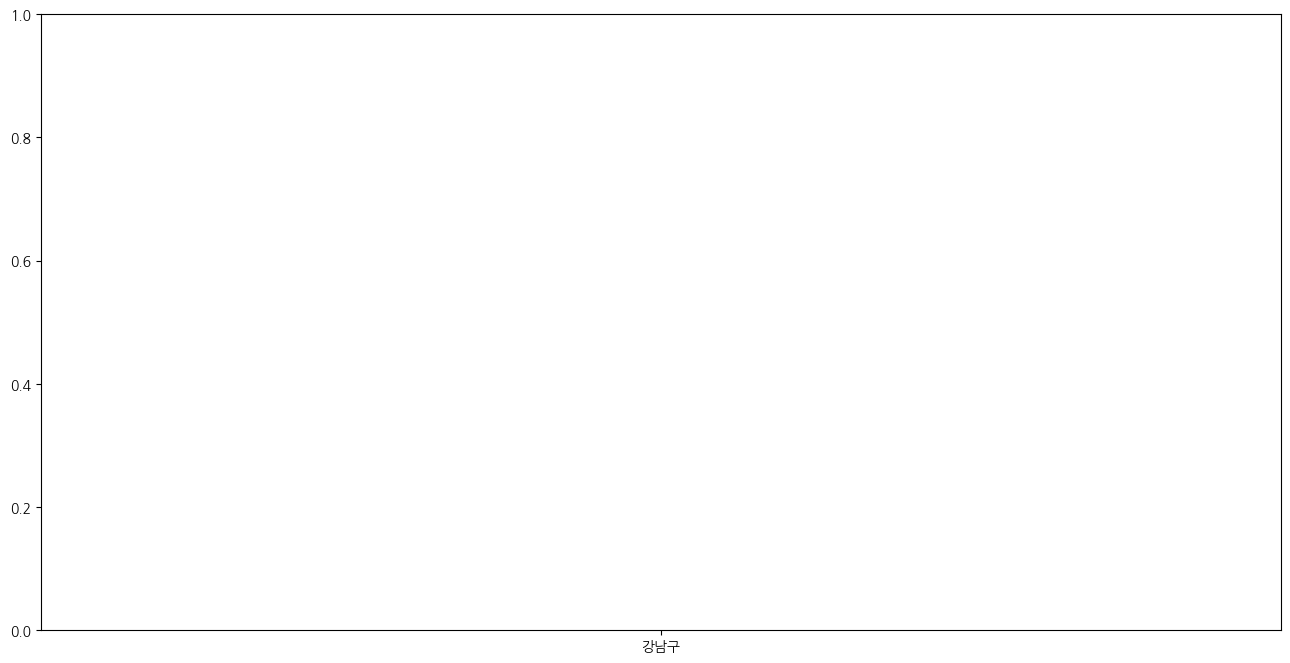

In [16]:
# ===========================================

# Í≥ºÏó∞ Î∞òÎ†§ÎèôÎ¨º ÏóÖÏû•ÏùÄ Î™∞Î†§ÏûàÏùÑÍπå AND Î∞òÎ†§ÎèôÎ¨º Îì±Î°ùÏàòÍ∞Ä ÎÜíÏùÄÍ∞Ä

# ===========================================


import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# ‚ñ∂Ô∏è .env ÌååÏùºÏùò ÌôòÍ≤ΩÎ≥ÄÏàò Î∂àÎü¨Ïò§Í∏∞
load_dotenv("/home/jiming/dev_ws/eda-repo-3/env")
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")

# ‚ñ∂Ô∏è MySQL Ïó∞Í≤∞
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:3306/{database}")


# Î∞òÎ†§ÎèôÎ¨º Îì±Î°ùÏàò ======================================
query = """
SELECT 
    sido as ÏãúÎèÑ,
    sigungu as ÏãúÍµ∞Íµ¨,
    dog_registered_total as Í∞úÎì±Î°ù_ÎàÑÍ≥Ñ,
    cat_registered_total as Í≥†ÏñëÏù¥Îì±Î°ù_ÎàÑÍ≥Ñ,
    total_registered as Ï¥ùÎì±Î°ù_ÎàÑÍ≥Ñ
FROM companion_animal_registration
WHERE sido = 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú'
ORDER BY total_registered DESC
"""
df = pd.read_sql(query, engine)

df.columns = ['ÏãúÎèÑ', 'ÏãúÍµ∞Íµ¨', 'Í∞úÎì±Î°ù_ÎàÑÍ≥Ñ', 'Í≥†ÏñëÏù¥Îì±Î°ù_ÎàÑÍ≥Ñ', 'Ï¥ùÎì±Î°ù_ÎàÑÍ≥Ñ']

# Îã§Ï§ë ÎßâÎåÄ Í∑∏ÎûòÌîÑÏö© Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
df_melted = df.melt(id_vars=['ÏãúÍµ∞Íµ¨'], 
                    value_vars=['Í∞úÎì±Î°ù_ÎàÑÍ≥Ñ', 'Í≥†ÏñëÏù¥Îì±Î°ù_ÎàÑÍ≥Ñ'],
                    var_name='Ï¢ÖÎ•ò', value_name='Îì±Î°ùÏàò')

df_register=df_melted


# ‚ñ∂Ô∏è ÎØ∏Ïö©Ïã§ ========================================
query = """
SELECT *
FROM animal_beauty_business
WHERE (status_name LIKE 'ÏòÅÏóÖ/Ï†ïÏÉÅ') AND (address_jibun LIKE 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú%%')
"""
df = pd.read_sql(query, engine)

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 1: Î¨∏ÏûêÏó¥ Î∂ÑÌï†
df['district'] = df['address_jibun'].str.split(' ').str[2]

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 2: Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©
import re
df['district'] = df['address_jibun'].str.extract(r'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ([Í∞Ä-Ìû£]+Íµ¨)')

# Íµ¨Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'beauty_count']
district_counts = district_counts.sort_values('beauty_count', ascending=False)
df_beauty = district_counts



# ‚ñ∂Ô∏è Î≥ëÏõê =======================================
query = """
SELECT jibun_address
FROM animal_hospital_registry
WHERE (status_name LIKE 'ÏòÅÏóÖ/Ï†ïÏÉÅ') AND (jibun_address LIKE 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú%%')
"""
df = pd.read_sql(query, engine)

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 1: Î¨∏ÏûêÏó¥ Î∂ÑÌï†
df['district'] = df['jibun_address'].str.split(' ').str[2]

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 2: Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©
import re
df['district'] = df['jibun_address'].str.extract(r'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ([Í∞Ä-Ìû£]+Íµ¨)')

# Íµ¨Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'hospital_count']
district_counts = district_counts.sort_values('hospital_count', ascending=False)

df_hospital = district_counts

# ‚ñ∂Ô∏è ÏïΩÍµ≠ =======================================
query = """
SELECT *
FROM animal_pharmacy_registry
WHERE (status_name LIKE 'ÏòÅÏóÖ/Ï†ïÏÉÅ') AND (jibun_address LIKE 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú%%')
"""
df = pd.read_sql(query, engine)

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 1: Î¨∏ÏûêÏó¥ Î∂ÑÌï†
df['district'] = df['jibun_address'].str.split(' ').str[2]

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 2: Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©
import re
df['district'] = df['jibun_address'].str.extract(r'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ([Í∞Ä-Ìû£]+Íµ¨)')

# Íµ¨Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'pharmacy_count']
district_counts = district_counts.sort_values('pharmacy_count', ascending=False)

df_pharmacy = district_counts


# ‚ñ∂Ô∏è ÏúÑÌÉÅÍ¥ÄÎ¶¨ÏóÖ =======================================
query = """
SELECT *
FROM seoul_animal_trust_facility
WHERE (status_name LIKE 'ÏòÅÏóÖ/Ï†ïÏÉÅ') AND (jibun_address LIKE 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú%%')
"""
df = pd.read_sql(query, engine)

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 1: Î¨∏ÏûêÏó¥ Î∂ÑÌï†
df['district'] = df['jibun_address'].str.split(' ').str[2]

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 2: Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©
import re
df['district'] = df['jibun_address'].str.extract(r'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ([Í∞Ä-Ìû£]+Íµ¨)')

# Íµ¨Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'animal_trust_count']
district_counts = district_counts.sort_values('animal_trust_count', ascending=False)


df_hotel = district_counts


# Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©ÌïòÍ∏∞ =============================================
df_merged = pd.merge(df_beauty, df_hospital,  on='district', how='inner')
df_merged = pd.merge(df_merged,df_pharmacy, on='district', how='inner')
df_merged = pd.merge(df_merged, df_hotel, on='district', how='inner')

df_merged_sorted = df_merged.sort_values(by='district', ascending=True)
df_merged_sorted['total_facilities'] = df_merged_sorted[['beauty_count', 'hospital_count', 'pharmacy_count', 'animal_trust_count']].sum(axis=1)



#ÏãúÍ∞ÅÌôî ================================================

plt.figure(figsize=(16,8))

x = df_merged_sorted['district']

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ (total_facilities)
plt.bar(x, df_register['Îì±Î°ùÏàò'], color='#4e79a7', alpha=0.6, label='Ï¥ù Î∞òÎ†§ÎèôÎ¨º Îì±Î°ù Ïàò')

# Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ (ÎØ∏Ïö©Ïã§, Î≥ëÏõê, ÏïΩÍµ≠, ÏúÑÌÉÅÍ¥ÄÎ¶¨ÏóÖ)
# plt.plot(x, df_merged_sorted['total_facilities'], marker ='x', label='Ï¥ù ÏãúÏÑ§ Ïàò')
plt.plot(x, df_merged_sorted['beauty_count'], marker='o', label='ÎØ∏Ïö©Ïã§ Ïàò')
plt.plot(x, df_merged_sorted['hospital_count'], marker='s', label='Î≥ëÏõê Ïàò')
plt.plot(x, df_merged_sorted['pharmacy_count'], marker='^', label='ÏïΩÍµ≠ Ïàò')
plt.plot(x, df_merged_sorted['animal_trust_count'], marker='D', label='ÏúÑÌÉÅÍ¥ÄÎ¶¨ÏóÖ Ïàò')

plt.xticks(rotation=45)
plt.xlabel('ÏûêÏπòÍµ¨')
plt.ylabel('ÏãúÏÑ§ Ïàò')
plt.title('ÏÑúÏö∏Ïãú ÏûêÏπòÍµ¨Î≥Ñ ÎèôÎ¨º Í¥ÄÎ†® ÏãúÏÑ§ ÌòÑÌô©')

plt.legend()
plt.tight_layout()

# # ‚ñ∂Ô∏è Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• Í≤ΩÎ°ú ÏßÄÏ†ï
# output_path = 'RESULT/visualization/ÏÑúÏö∏Ïãú ÏûêÏπòÍµ¨Î≥Ñ ÎèôÎ¨º Í¥ÄÎ†® ÏãúÏÑ§ ÌòÑÌô©.png'
# # os.makedirs(os.path.dirname(output_path), exist_ok=True)  # Ìè¥ÎçîÍ∞Ä ÏóÜÏúºÎ©¥ ÏÉùÏÑ±
# plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Í≥†Ìï¥ÏÉÅÎèÑ Ï†ÄÏû•


# plt.show()


plt.show()

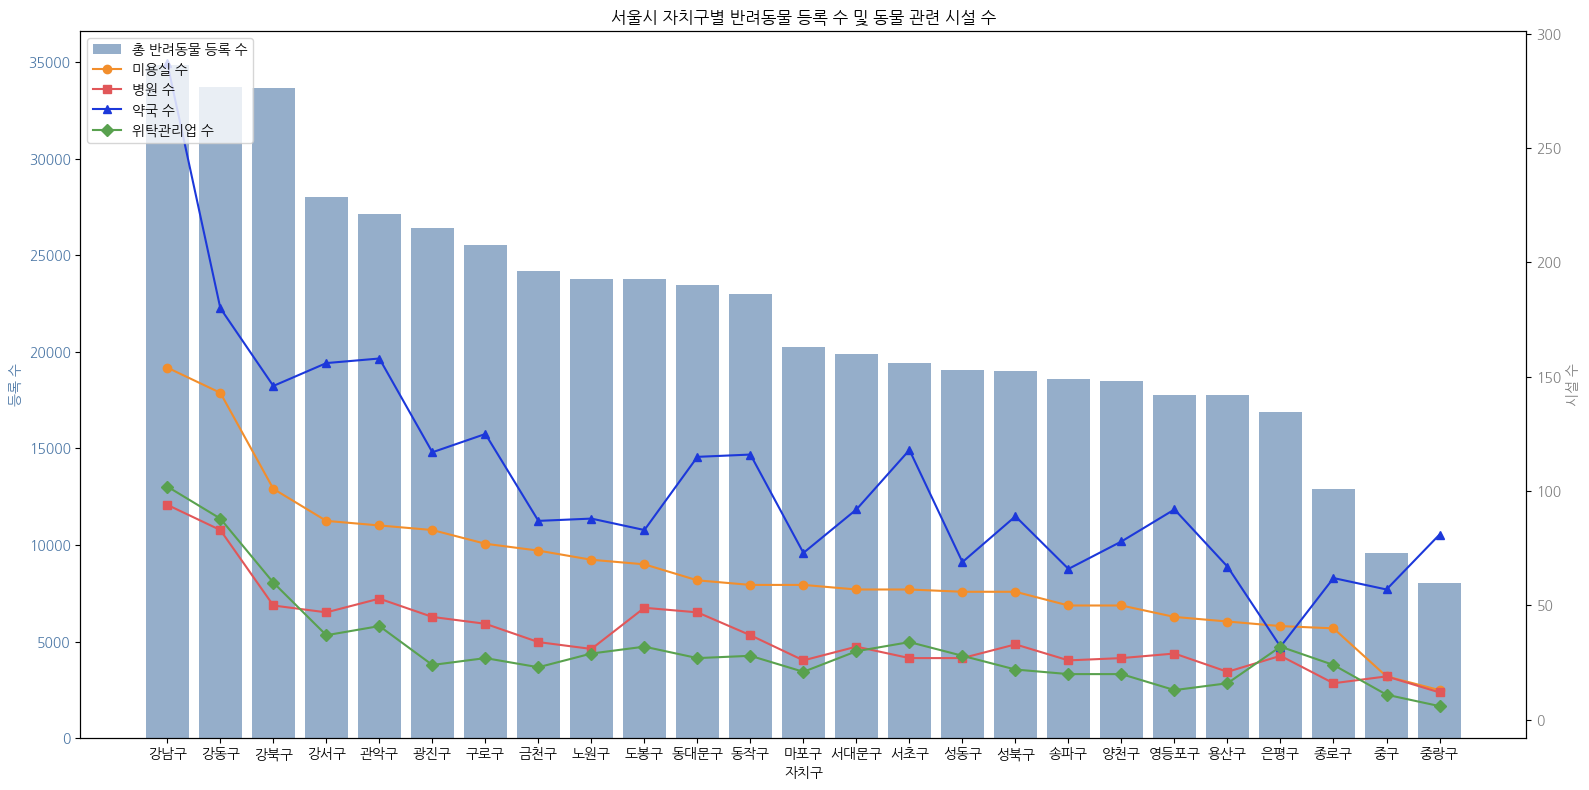

In [ ]:
# ===========================================

# Í≥ºÏó∞ Î∞òÎ†§ÎèôÎ¨º ÏóÖÏû•ÏùÄ Î™∞Î†§ÏûàÏùÑÍπå AND Î∞òÎ†§ÎèôÎ¨º Îì±Î°ùÏàòÍ∞Ä ÎÜíÏùÄÍ∞Ä

# ===========================================


import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# ‚ñ∂Ô∏è .env ÌååÏùºÏùò ÌôòÍ≤ΩÎ≥ÄÏàò Î∂àÎü¨Ïò§Í∏∞
load_dotenv("/home/jiming/dev_ws/eda-repo-3/env")
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")

# ‚ñ∂Ô∏è MySQL Ïó∞Í≤∞
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:3306/{database}")


# Î∞òÎ†§ÎèôÎ¨º Îì±Î°ùÏàò ======================================
query = """
SELECT 
    sigungu as ÏãúÍµ∞Íµ¨,
    total_registered as Ï¥ùÎì±Î°ù_ÎàÑÍ≥Ñ
FROM companion_animal_registration
WHERE sido = 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú'
ORDER BY total_registered DESC
"""
df_register = pd.read_sql(query, engine)

df_register.columns = ['ÏãúÍµ∞Íµ¨','Ï¥ùÎì±Î°ù_ÎàÑÍ≥Ñ']




# ‚ñ∂Ô∏è ÎØ∏Ïö©Ïã§ ========================================
query = """
SELECT *
FROM animal_beauty_business
WHERE (status_name LIKE 'ÏòÅÏóÖ/Ï†ïÏÉÅ') AND (address_jibun LIKE 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú%%')
"""
df = pd.read_sql(query, engine)

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 1: Î¨∏ÏûêÏó¥ Î∂ÑÌï†
df['district'] = df['address_jibun'].str.split(' ').str[2]

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 2: Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©
import re
df['district'] = df['address_jibun'].str.extract(r'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ([Í∞Ä-Ìû£]+Íµ¨)')

# Íµ¨Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'beauty_count']
district_counts = district_counts.sort_values('beauty_count', ascending=False)
df_beauty = district_counts



# ‚ñ∂Ô∏è Î≥ëÏõê =======================================
query = """
SELECT jibun_address
FROM animal_hospital_registry
WHERE (status_name LIKE 'ÏòÅÏóÖ/Ï†ïÏÉÅ') AND (jibun_address LIKE 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú%%')
"""
df = pd.read_sql(query, engine)

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 1: Î¨∏ÏûêÏó¥ Î∂ÑÌï†
df['district'] = df['jibun_address'].str.split(' ').str[2]

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 2: Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©
import re
df['district'] = df['jibun_address'].str.extract(r'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ([Í∞Ä-Ìû£]+Íµ¨)')

# Íµ¨Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'hospital_count']
district_counts = district_counts.sort_values('hospital_count', ascending=False)

df_hospital = district_counts

# ‚ñ∂Ô∏è ÏïΩÍµ≠ =======================================
query = """
SELECT *
FROM animal_pharmacy_registry
WHERE (status_name LIKE 'ÏòÅÏóÖ/Ï†ïÏÉÅ') AND (jibun_address LIKE 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú%%')
"""
df = pd.read_sql(query, engine)

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 1: Î¨∏ÏûêÏó¥ Î∂ÑÌï†
df['district'] = df['jibun_address'].str.split(' ').str[2]

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 2: Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©
import re
df['district'] = df['jibun_address'].str.extract(r'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ([Í∞Ä-Ìû£]+Íµ¨)')

# Íµ¨Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'pharmacy_count']
district_counts = district_counts.sort_values('pharmacy_count', ascending=False)

df_pharmacy = district_counts


# ‚ñ∂Ô∏è ÏúÑÌÉÅÍ¥ÄÎ¶¨ÏóÖ =======================================
query = """
SELECT *
FROM seoul_animal_trust_facility
WHERE (status_name LIKE 'ÏòÅÏóÖ/Ï†ïÏÉÅ') AND (jibun_address LIKE 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú%%')
"""
df = pd.read_sql(query, engine)

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 1: Î¨∏ÏûêÏó¥ Î∂ÑÌï†
df['district'] = df['jibun_address'].str.split(' ').str[2]

# Íµ¨ Ïù¥Î¶Ñ Ï∂îÏ∂ú Î∞©Î≤ï 2: Ï†ïÍ∑úÌëúÌòÑÏãù ÏÇ¨Ïö©
import re
df['district'] = df['jibun_address'].str.extract(r'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ([Í∞Ä-Ìû£]+Íµ¨)')

# Íµ¨Î≥Ñ Í∞úÏàò ÏßëÍ≥Ñ
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'animal_trust_count']
district_counts = district_counts.sort_values('animal_trust_count', ascending=False)


df_hotel = district_counts


# Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©ÌïòÍ∏∞ =============================================
df_plot = pd.merge(df_beauty, df_hospital,  on='district', how='inner')
df_plot = pd.merge(df_plot,df_pharmacy, on='district', how='inner')
df_plot = pd.merge(df_plot, df_hotel, on='district', how='inner')

df_merged_sorted = df_plot.sort_values(by='district', ascending=True)
df_merged_sorted['total_facilities'] = df_merged_sorted[['beauty_count', 'hospital_count', 'pharmacy_count', 'animal_trust_count']].sum(axis=1)



#ÏãúÍ∞ÅÌôî ================================================
plt.figure(figsize=(16,8))

x = df_merged_sorted['district']

# üîµ Ï£º yÏ∂ï (ÏôºÏ™Ω) - ÎßâÎåÄÍ∑∏ÎûòÌîÑ
ax1 = plt.gca()
ax1.bar(x, df_register['Ï¥ùÎì±Î°ù_ÎàÑÍ≥Ñ'], color='#4e79a7', alpha=0.6, label='Ï¥ù Î∞òÎ†§ÎèôÎ¨º Îì±Î°ù Ïàò')
ax1.set_ylabel('Îì±Î°ù Ïàò', color='#4e79a7')
ax1.tick_params(axis='y', labelcolor='#4e79a7')

# üî¥ Î≥¥Ï°∞ yÏ∂ï (Ïò§Î•∏Ï™Ω) - Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ
ax2 = ax1.twinx()
ax2.plot(x, df_plot['beauty_count'], marker='o', label='ÎØ∏Ïö©Ïã§ Ïàò', color='#f28e2c')
ax2.plot(x, df_plot['hospital_count'], marker='s', label='Î≥ëÏõê Ïàò', color='#e15759')
ax2.plot(x, df_plot['pharmacy_count'], marker='^', label='ÏïΩÍµ≠ Ïàò', color="#1c38da")
ax2.plot(x, df_plot['animal_trust_count'], marker='D', label='ÏúÑÌÉÅÍ¥ÄÎ¶¨ÏóÖ Ïàò', color='#59a14f')
ax2.set_ylabel('ÏãúÏÑ§ Ïàò', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# ‚úÖ Í≥µÌÜµ ÏÑ§Ï†ï
plt.xticks(rotation=45)
ax1.set_xlabel('ÏûêÏπòÍµ¨')
plt.title('ÏÑúÏö∏Ïãú ÏûêÏπòÍµ¨Î≥Ñ Î∞òÎ†§ÎèôÎ¨º Îì±Î°ù Ïàò Î∞è ÎèôÎ¨º Í¥ÄÎ†® ÏãúÏÑ§ Ïàò')

# ‚úÖ Î≤îÎ°Ä Ìï©ÏπòÍ∏∞
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()



